In [215]:
import numpy as np
from numpy import zeros, eye
from numpy.linalg import norm

import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal as MVN
from scipy.optimize import fsolve

In [254]:
# Settings
r = 2.0     # Radius of sphere
h = 3.0     # Scale for SPS velocity
δ = 4.0     # Step-size for HUG

def point_on_sphere(r=r):
    point = MVN(zeros(3), eye(3)).rvs()
    return (point / norm(point)) * r

def sample_velocity():
    return MVN(zeros(3), eye(3)).rvs()

def is_on_sphere(z, r=r):
    return (norm(z) - r) == 0.0

In [338]:
z = point_on_sphere()
v = sample_velocity()

In [339]:
def sps_proposal(z, v, h=h):
    dz̃ = h*v
    dz = dz̃ - z*(z@dz̃) / (norm(z)**2)
    return (z + dz) * norm(z) / norm(z + dz)

In [340]:
def hug_proposal(z, v, δ=δ):
    midpoint = z + (δ/2)*v
    ĝ = midpoint / norm(midpoint)
    v_new = v - 2 * ĝ * (ĝ @ v)
    return midpoint + (δ/2) * v_new

In [366]:
def plot_δopt_for_h_grid():
    hs = np.linspace(0.0, 500.0, num=50)
    δs = []
    for h in hs:
        find_δ = lambda δ: norm(sps_proposal(z, v, h=h) - hug_proposal(z, v, δ))
        δopt = fsolve(find_δ, 1.0)
        δs.append(δopt)
    δs = np.array(δs)
    return hs, δs

In [367]:
hs, δs = plot_δopt_for_h_grid()

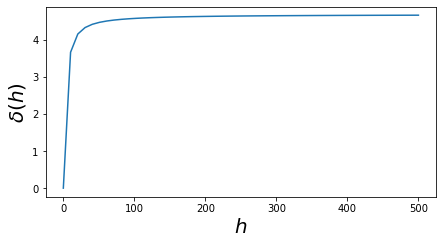

In [368]:
fig, ax = plt.subplots()
ax.plot(hs, δs)
ax.set_xlabel(r'$h$', fontsize=20)
ax.set_ylabel(r'$δ(h)$', fontsize=20)
plt.show()

In [358]:
-(((2*d) / (1 + (hs[3]**2)*(d-1))) - 2*d)

3.896061730933648

In [357]:
δs[3]

array([3.09784696])

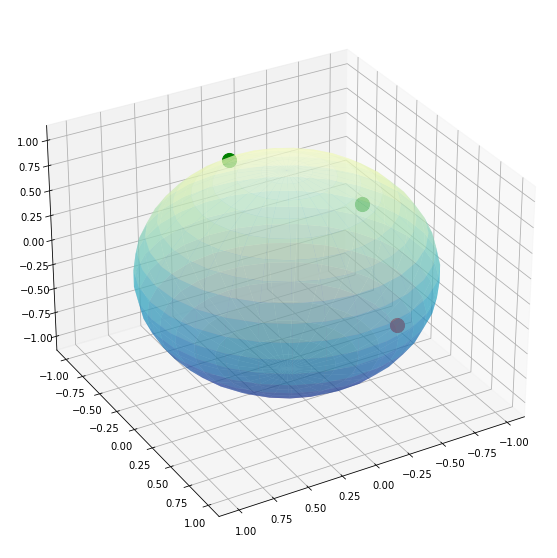

In [195]:
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
r = 0.05
def surface_points():
    u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    return x, y, z
ax.plot_surface(*surface_points(), cmap=plt.cm.YlGnBu_r, alpha=0.5)
ax.scatter(*ẑ, zorder=1000, s=200, c='red')
ax.scatter(*sps_proposal(z, v), zorder=1000, s=200, c='green')
ax.scatter(*hug_proposal(z, v), zorder=1000, s=200, c='green')
ax.view_init(azim=60)
plt.show()